# Exercise 1: Visualize a MNIST Character

The MNIST data set is often used a people's first example in a neural networks course.  It is a database fo 60,000 handwritten images of numerical digits from 0 to 9.  Your Artificial Intelligence course will also take this tack. Here is a link to the origin of the MNIST dataset: [MNIST Origin Page](http://yann.lecun.com/exdb/mnist/). Here is a more convenient place to download the MNIST data in CSV format: [MNIST in CSV from Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv/downloads/mnist-in-csv.zip/2/).  I have downloaded the data from the second source and made it available to you.  Its zip file includes two files <i>mnist_test.csv</i> and <i>mnist_train.csv</i>.  We will use the former file, which included 10,000 images. 

Each MNIST character is 28 $\times$ 28 pixels, each of which are coded in grayscale as represented by a digit from 0 to 255.  The data for each image in <i>mnist_train.csv</i> is given as 784 characters ($28 \times 28$) on a single line.

The data for one example MNIST character from the file <font face = 'courier'>ministEg.txt</font> is shown below as is the character it represents.  The original MNIST data have been converted into 28 lines of 28 data elements so that it can be more easily inputted into a 28 $\times$ 28 array or list of lists and, subsequently, rendered by matplotlib.     
![MNIST Example Data](images/mnistEg.jpg)
![MNIST character Image](images/mnist7.jpg)

## The Task
Import the data from  <font face = 'courier'>ministEg.txt</font>, put it into a list of lists with numerical elements, and plot it with the <font face = 'courier'>matplotlib</font> package as was done in lecture with other images.  Specifically, render the image using the <font face = 'courier'>plt.imshow()</font> and <font face = 'courier'>plt.show()</font> commands as we did in class.  The argument <font face = 'courier'>cmap = 'gray'</font> communicates to <font face = 'courier'>matplotlib</font> that the data reflect a grayscale image.  The <font face = 'courier'>import</font> statement and the aforementioned commands are included in the cell below for convenience.

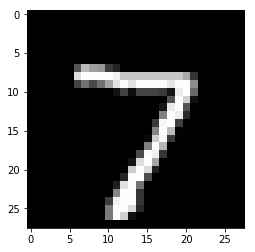

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
f = open('mnistEg.txt', 'r')
pixelsShow = f.readlines()

input_list = []
for i in range(len(pixelsShow)):
    new_row = []
    pixelsShow[i] = pixelsShow[i].strip().split(',') # splited by `,`
    pixelsShow[i] = [int(j) for j in pixelsShow[i]] # transform to `int` type.

f.close()

plt.imshow(pixelsShow, cmap='gray')        
plt.show()  

# Exercise 2: Import data from <font face='courier'>mnist_train_partial.csv</font> and create two lists from it 

- Create a variable named <font face = 'courier'>labels</font> that is a list of the 0th element in each line of the <font face='courier'>mnist_train_partial.csv</font> file that denotes which integer is represented in the image.  
- Create a second variable <font face = 'courier'>pixels</font> which contains _flattened_ representations of the image data with a number of rows (sublists) equal to the number of images with each row having 784 data elements.  This flattened format is required with some neural network models.
- The first row of <font face='courier'>mnist_train_partial.csv</font> contains column headings.  You may ignore this row.
- Place the contents of the rows into <font face='courier'>label</font> and <font face='courier'>pixels</font> and print those 10 elements from <font face='courier'>labels</font> and <font face='courier'>pixels</font>.

In [2]:
import csv
import numpy as np
with open('./mnist_train_partial.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    mnist_train_partial = []
    for i, v in enumerate(csvReader):
        if i == 0: # skip the description
            continue
        mnist_train_partial.append(v)
    # convert to numpy:
    mnist_train_partial = np.asarray(mnist_train_partial, dtype = np.int32)

# get `labels`:
labels = list(mnist_train_partial[:, 0])
print("labels: {}".format(labels))

# get `pixels`:
pixels = mnist_train_partial[:, 1:]
print("pixels.shape: {}".format(pixels.shape))
print("pixels:")
print(pixels)

# Tips: pixels is `numpy`, labels is `list`.

labels: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
pixels.shape: (10, 784)
pixels:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Exercise 3: Import data from  <font face='courier'>mnist_train_partial.csv</font> and create a list of lists

<font face='courier'>mnist_train_partial.csv</font> gives the data for the 784 pixels of each character on a single line, with the first element being the <font face='courier'>label</font> of the image, which indicates the numerical digit represented in the image. The first line of the file is a legend that describes the format of the remaining 10 lines.  

- Create a variable named <font face='courier'>mnist</font>, which ultimately will be a list of lists
- Do the following for the lines in <font face='courier'>mnist_train_partial.csv</font>
    - Insert a sublist into the list named <font face='courier'>mnist</font> for each line in <font face='courier'>mnist_train_partial.csv</font> 
    - The 0-th element in the sublists should be the image label
    - The 1-st element in the sublists should be a 1-dimensional list of the image data
- Note that the <font face='courier'>mnist</font> list of lists has a maximum depth of three lists, that is, it is a list of lists of lists. 

In [3]:
mnist = []
for i in range(mnist_train_partial.shape[0]):
    mnistSubList = []
    mnistSubList.append(mnist_train_partial[i][0]) # push label
    mnistSubList.append(list(mnist_train_partial[i][1:])) # push pixels
    mnist.append(mnistSubList)
print("len(mnist): {}".format(len(mnist)))
print("len(mnistSubList) (length of sublist): {}".format(len(mnist[0])))
print("len(mnistSubList[1]) (length of pixels): {}".format(len(mnist[0][1])))
print("mnist[0] (the first of sublist mnistSubList):")
print(mnist[0])

# Tips (the table structure):
### mnist: [mnistSubList, mnistSubList, ... , mnistSubList]
### mnistSubList: [label, [pixels]]

len(mnist): 10
len(mnistSubList) (length of sublist): 2
len(mnistSubList[1]) (length of pixels): 784
mnist[0] (the first of sublist mnistSubList):
[5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Exercise 4
Modify your solution to <b>Exercise 3</b> so that the new lists of lists <font face='courier'>mnist1</font>  has these elements:
- Its 0th element is the image label
- Its 1st element is a list of lists with 28 sublists each with 28 elements
When this task is successfully finished, you should be able to plot characters with the code in the second cell below.

In [4]:
mnist1 = []
for i in range(len(mnist)):
    mnist1SubList = [] # mnist1SubList: sublist of mnist1
    mnist1SubList.append(mnist[i][0]) # push label
    npPixels = np.array(mnist[i][1])
    mnist1SubList.append(np.reshape(npPixels, (28, 28)).tolist()) # push 28x28 pixels
    mnist1.append(mnist1SubList)

print(len(mnist1))
print(len(mnist1[0]))
print(len(mnist1[0][1]))
print(len(mnist1[0][1][0]))

10
2
28
28


MNIST label:  5


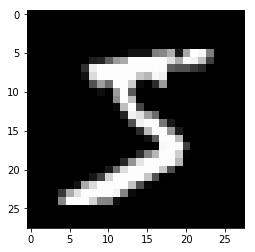

In [5]:
# This code will render the specified MNIST images if the exercise above is done successfully
import matplotlib.pyplot as plt

characterIndex = 0  # line number index from text file from 0 to 9
print('MNIST label: ',mnist[characterIndex][0])
plt.imshow(mnist1[characterIndex][1], cmap='gray')        
plt.show()  

# Exercise 5: Alter the Image in the <font face='courier'>mnistEg.txt</font> File 

Read in the file <font face='courier'>mnistEg.txt</font> and alter the data so that the pixels on both diagonals are red.  In other words, there should be a red 'X' over the top of the image.  Render the image with <font face='courier'>matplotlib</font>.

Hints: Gray scale colors have equal proportions red, green, and blue (RGB) hues, as in these exmaples:    
    - Black: (R,G,B) = (0,0,0)
    - White: (R,G,B) = (255,255,255)
    - Medium Gray: (R,G,B) = (128,128,128)
    - Dark Gray: (R,G,B) = (80,80,80)
Also, the RGB code for red is (255,0,0).

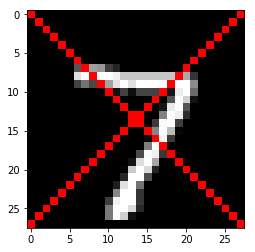

In [6]:
colorPixels = pixelsShow
for j in range(28):
    for k in range(28):
        colorPixels[j][k] = (colorPixels[j][k], colorPixels[j][k], colorPixels[j][k])
# a red 'X' over the top of the image:
for i in range(28):
    colorPixels[i][i], colorPixels[i][27 - i] = (255,0,0), (255,0,0)
plt.imshow(colorPixels)
plt.show()

# Exercise 6

Open the file named <font face='courier'>Q.txt</font> and convert it into a list of lists with numerical elements where each line of the text file constitutes the contents destined for each sublist.  Use the variable name <font face='courier'>Q</font> for this list of lists.

In [7]:
from numpy import genfromtxt
Q = genfromtxt('Q.txt', delimiter=',').tolist()
print("Q:")
print(Q)

Q:
[[-0.2136446237564087, 0.6914951205253601, -0.14130067825317383, 0.5813472270965576, 0.31298375129699707, -0.032082825899124146], [-0.28420910239219666, 0.4631018042564392, -0.2138504683971405, -0.6123285889625549, -0.0005883228150196373, -0.06157679110765457], [-0.354773610830307, 0.23470847308635712, -0.05277771130204201, 0.1226695105433464, -0.7669532895088196, -0.34284961223602295], [-0.42533808946609497, 0.006315156351774931, 0.8420806527137756, -0.4003300070762634, 0.10868244618177414, 0.8741424679756165], [-0.4959025979042053, -0.22207815945148468, 0.03607717156410217, -0.02477017603814602, 0.5209295749664307, -0.3130148649215698], [-0.5664671063423157, -0.4504714906215668, -0.4702289402484894, 0.3334120810031891, -0.1750541627407074, -0.12461839616298676]]


# Exercise 7

Open the file named <font face='courier'>L.txt</font> and convert it into a list with numerical elements where each line of the text file constitutes the contents destined for an element of the list.  Create a list of lists in the variable name <font face='courier'>Lambda</font> that has all zero elements except along the diagonal where you should put the values from <font face='courier'>L.txt</font> in the order they appear in <font face='courier'>L.txt</font>.

In [8]:
from numpy import genfromtxt
L = genfromtxt('L.txt', delimiter=',').tolist()
Lambda = np.zeros((len(L), len(L)))
for i in range(len(L)):
    Lambda[i][i] = L[i]
Lambda = Lambda.tolist()
print("Lambda:")
print(Lambda)

Lambda:
[[33.16590118408203, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -3.1659021377563477, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


# Exercise 8

Use for loops to transpose the list of lists in variable <font face='courier'>Q</font> and use the variable name <font face='courier'>QT</font> for the result.

In [9]:
QT = [[0]*len(Q[0]) for i in range(len(Q))] # init
# transpose:
for i in range(len(Q)):
    for j in range(len(Q[0])):
        QT[i][j] = Q[j][i]

# Exercise 9

Square, real symmetric matrices, such as the one we represent here with $A$, can be factored into three matrices of this form:

$A = Q \Lambda Q^T $

Reconstitute the matrix A implied by the list of lists you have defined using this formula and your defined Python variables:  A = Q   Lambda   QT

Hint: Round each matrix element of the result to an integer.  A distinct pattern will be present in the result if you have done the computation correctly.

In [10]:
Qnp, QTnp, Lambdanp = np.array(Q), np.array(QT), np.array(Lambda)
A = np.array(np.dot(Qnp, Lambdanp).dot(QTnp), dtype=np.int32)
print("A: (Round each matrix element of the result to an integer)")
print(A)

A: (Round each matrix element of the result to an integer)
[[ 0  0  2  2  4  5]
 [ 0  1  2  3  4  5]
 [ 2  2  4  4  5  7]
 [ 2  3  4  5  6  7]
 [ 4  4  5  6  7  9]
 [ 5  5  7  7  9 10]]


# Exercise 10
The data in the file <font face = 'courier'>npFull.txt</font> contains information about United States National Parks.  The first data element in each line of the file contains the name of the national park.  The remaining fields represent various data about each park including:
- The states where the park is located
- Park acreage
- Number of visitors to each park in 2018
- Latitude and Longitude
- Date that each park was established

Perform these tasks with the data
- Read the data file, converting each numerical element of data into a numerical Python element
- Create a dictionary <font face = 'courier'>natParkDict</font>
    - The keys are the  name of the parks
    - The dictionary values are the remaining data elements in each file line, inserted into a list

In [11]:
import pandas as pd
parkDf = pd.read_csv('npFull.txt', encoding="unicode_escape")
print(parkDf.head(3))
colKey = [
    "Location",
    "Date established as park[5][9]",
    "Area (2018)[10]",
    "Recreation visitors (2018)[7]"
]
natParkDict = {}
for index, row in parkDf.iterrows():
    value = {}
    # Date established as park[5][9] can be a `data` type
    for i in [0, 1]:
        value[colKey[i]] = row[colKey[i]]
    value[colKey[2]] = float(row[colKey[3]])
    value[colKey[3]] = int(row[colKey[3]])
    value['longitude and latitude'] = row[5]
    natParkDict[row['Name']] = value
print("\n")
print("-"*80)
# print the dictionary:
print("the first element of `natParkDict`:")
for i in natParkDict.keys():
    print("key: {}".format(i))
    print(natParkDict[i])
    break

             Name        Location Date established as park[5][9]  \
0          Acadia           Maine               February 26 1919   
1  American Samoa  American Samoa                October 31 1988   
2          Arches            Utah               November 12 1971   

   Area (2018)[10]  Recreation visitors (2018)[7]  \
0         49075.26                        3537575   
1          8256.67                          28626   
2         76678.98                        1663557   

                                          Unnamed: 5  
0   44°21N 68°13W / 44.35°N 68.21°W / 44.35; -68.21   
1  14°15S 170°41W / 14.25°S 170.68°W / -14.25; -1...  
2  38°41N 109°34W / 38.68°N 109.57°W / 38.68; -10...  


--------------------------------------------------------------------------------
the first element of `natParkDict`:
key: Acadia
{'Location': 'Maine', 'Date established as park[5][9]': 'February 26 1919', 'Area (2018)[10]': 3537575.0, 'Recreation visitors (2018)[7]': 3537575, 'longitude and 

# Exercise 11
Repeat <b>Exercise 2</b> using list comprehension while naming the resulting lists <font face = 'courier'>labels1</font> and <font face = 'courier'>pixels1</font>.

In [12]:
import csv
import numpy as np
with open('./mnist_train_partial.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    
    # **here, list comprehension**:
    mnist_train_partial_1 = [v for v in csvReader]
    del mnist_train_partial_1[0]
    mnist_train_partial_1 = np.asarray(mnist_train_partial_1, dtype = np.int32)

# get `labels1`:
# list comprehension:
labels1 = [i for i in mnist_train_partial_1[:, 0]]
print("labels1: {}".format(labels1))

# get `pixels1`:
pixels1 = mnist_train_partial_1[:, 1:]
print("pixels1.shape: {}".format(pixels1.shape))
print("pixels1:")
print(pixels1)

labels1: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
pixels1.shape: (10, 784)
pixels1:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Exercise 12
Repeat <b>Exercise 3</b> using list comprehension while naming the resulting data structure <font face = 'courier'>mnist2</font>.

In [13]:
mnist2 = []
for i in range(mnist_train_partial.shape[0]):
    mnistSubList = []
    mnistSubList.append(mnist_train_partial[i][0]) # push label
    
    # list comprehension:
    mnistSubList.append([mnist_train_partial[i][k] for k in range(1, len(mnist_train_partial[i]))]) # push pixels
    mnist2.append(mnistSubList)
print("len(mnist2): {}".format(len(mnist2)))
print("len(mnistSubList) (length of sublist): {}".format(len(mnist2[0])))
print("len(mnistSubList[1]) (length of pixels): {}".format(len(mnist2[0][1])))
print("mnist2[0] (the first of sublist mnistSubList):")
print(mnist2[0])

# Tips (the table structure):
### mnist2: [mnistSubList, mnistSubList, ... , mnistSubList]
### mnistSubList: [label, [pixels]]

len(mnist2): 10
len(mnistSubList) (length of sublist): 2
len(mnistSubList[1]) (length of pixels): 784
mnist2[0] (the first of sublist mnistSubList):
[5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Exercise 13
Repeat <b>Exercise 4</b> using list comprehension while naming the resulting data structure <font face = 'courier'>mnist3</font>.

10
2
28
28
MNIST label:  5


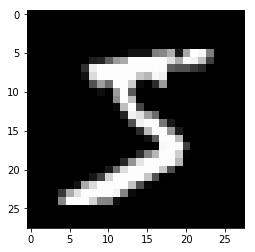

In [14]:
mnist3 = []
for i in range(len(mnist)):
    mnist1SubList = [] # mnist1SubList: sublist of mnist3
    mnist1SubList.append(mnist[i][0]) # push label
    npPixels = np.array(mnist[i][1])
    
    # list comprehension:
    subsub = [npPixels[i:i+28].tolist() for i in range(0, 28 * 28, 28)]
    mnist1SubList.append(subsub) # push 28x28 pixels
    mnist3.append(mnist1SubList)

print(len(mnist3))
print(len(mnist3[0]))
print(len(mnist3[0][1]))
print(len(mnist3[0][1][0]))

# This code will render the specified MNIST images if the exercise above is done successfully
import matplotlib.pyplot as plt

characterIndex = 0  # line number index from text file from 0 to 9
print('MNIST label: ',mnist3[characterIndex][0])
plt.imshow(mnist1[characterIndex][1], cmap='gray')        
plt.show()